In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sb
import math
import statistics

In [2]:
def my_graph(df, condition, value1, value2, field) :
    
    # df - dataframe 
    # condition - умова, за якою будуть відібрані значення
    # value1 - значення першої умови
    # value2 - значення другої умови
    # fild - назва стовпця зі значеннями
    
    dataX = df.loc[df[condition] == value1, field]
    dataY = df.loc[df[condition] == value2, field]
    plt.figure(figsize=(20,5))
    plt.subplot(1, 4, 1)
    sb.histplot(dataX, kde = True)
    plt.subplot(1, 4, 2)
    sb.histplot(dataY, kde = True)
    plt.subplot(1, 4, 3)
    ss.probplot(dataX, plot = plt)
    plt.subplot(1, 4, 4)
    ss.probplot(dataY, plot = plt)
    return


def my_coef(df, condition, value, field):
    
    # df - dataframe 
    # condition - умова, за якою будуть відібрані значення
    # value - значення умови
    # fild - назва стовпця зі значеннями
    
    print("\n --------------------------- ", value, " --------------------------- ")
    alpha = 0.05
    data = df[(df[condition] == value)][field]
    size = data.size
    
    A = ss.skew(data)
    sigmaA = math.sqrt((6 * (size - 2)) / ((size + 1) * (size + 3)))
    uA = (A - 0) / sigmaA
    
    E = ss.kurtosis(data)
    sigmaE = math.sqrt((24 * size * (size - 2) * (size - 3))/(pow((size + 1), 2) * (size + 3 * (size + 5))))
    uE = (E - 0) / sigmaE
    
    quantile = ss.norm.ppf(1-alpha/2)
    absUA = abs(uA)
    absUE = abs(uE)
    
    table = pd.DataFrame(columns={"Параметр","Значення"})
    table.loc[len(table)] = ["A", A]
    table.loc[len(table)] = ["sigmaA", sigmaA]
    table.loc[len(table)] = ["uA", uA]
    table.loc[len(table)] = ["E", E]
    table.loc[len(table)] = ["sigmaE", sigmaE]
    table.loc[len(table)] = ["uE", uE]
    table.loc[len(table)] = ["ABS uA", absUA]
    table.loc[len(table)] = ["ABS uE", absUE]
    table.loc[len(table)] = ["Quantile", quantile]
    if absUA <= quantile and absUE <= quantile :
        table.loc[len(table)] = ["Висновок", "Нормальний розподіл ідентифікується"]
        std = math.pow(data.std(ddof = 1),2)
        quantile = ss.t.ppf(1-alpha/2, size-1)
        std_std = std / math.sqrt(2 * size)
        std_start = std - quantile * std_std
        std_end = std + quantile * std_std
        table.loc[len(table)] = ["std", std]
        table.loc[len(table)] = ["std2", '[%6.3f ; %6.3f]' % (std_start, std_end)]
    
        display(table.style.hide_index())
        return True
    else :
        table.loc[len(table)] = ["Висновок", "Нормальний розподіл не ідентифікується"]
        display(table.style.hide_index())
        return False


def my_mean(df, condition, value, field, norm = 0) :
    
    # df - dataframe 
    # condition - умова, за якою будуть відібрані значення
    # value - значення умови
    # fild - назва стовпця зі значеннями
    # norm - нормальність розподілення, 0 - нормально, 1 - не нормально
    
    data = df[(df[condition] == value)][field]
    alpha = 0.05
    quantile = ss.norm.ppf(1-alpha/2)
    size = data.size
    mean = data.mean()
    std = data.std(ddof = 1)
    # довірчі інтервали
    mean_start = mean - quantile * std / (size**0.5)
    mean_end = mean + quantile * std / (size**0.5)
    
    table = pd.DataFrame(columns={'Середнє для %3s' % (value) : 1,"Довірчий інтервал": 2})
    table.loc[len(table)] = [mean, '[%6.3f ; %6.3f]' % (mean_start, mean_end)]
    display(table.style.hide_index())
    
    if norm == 1 :
        # медіану та 95% довірчий інтервал для неї
        data2 = sorted(data)
        if size % 2 == 0:
            median = (data2[int(size / 2)] + data2[int(size / 2 +1)])/2
        else:  
            median = data2[(int((size + 1) / 2))]  
        j = int(size / 2 - quantile * (size**0.5) / 2)
        k = int(size / 2 + 1 + quantile * (size**0.5) / 2)
        median_l = data2[j]
        median_u = data2[k]  
        table2 = pd.DataFrame(columns={'Медіана для %3s' % (value) : 1,"Довірчий інтервал": 2})
        table2.loc[len(table2)] = [median, '[%6.3f ; %6.3f]' % (median_l, median_u)]
        display(table2.style.hide_index())
    return 


def my_difference(df, condition, value1, value2, field) :
    print("\n --------------------------- Вибірка різниць --------------------------- ")
    dataX = df.loc[df[condition] == value1, field]
    dataY = df.loc[df[condition] == value2, field]
    data = pd.Series((dataX.iloc[i]-dataY.iloc[i]) for i in range(dataX.size))
    size = data.size
    alpha = 0.05
    quantile = ss.norm.ppf(1-alpha/2)
    
    mean = data.mean()
    std = data.std(ddof = 1)
    # довірчі інтервали
    mean_start = mean - quantile * std / (size**0.5)
    mean_end = mean + quantile * std / (size**0.5)
    
    table1 = pd.DataFrame(columns={'Середнє для вибірки різниць' : 1,"Довірчий інтервал": 2})
    table1.loc[len(table1)] = [mean, '[%6.3f ; %6.3f]' % (mean_start, mean_end)]
    display(table1.style.hide_index())
    
    A = ss.skew(data)
    sigmaA = math.sqrt((6 * (size - 2)) / ((size + 1) * (size + 3)))
    uA = (A - 0) / sigmaA
    
    E = ss.kurtosis(data)
    sigmaE = math.sqrt((24 * size * (size - 2) * (size - 3))/(pow((size + 1), 2) * (size + 3 * (size + 5))))
    uE = (E - 0) / sigmaE
    
    absUA = abs(uA)
    absUE = abs(uE)
    
    table = pd.DataFrame(columns={"Параметр","Значення"})
    table.loc[len(table)] = ["A", A]
    table.loc[len(table)] = ["sigmaA", sigmaA]
    table.loc[len(table)] = ["uA", uA]
    table.loc[len(table)] = ["E", E]
    table.loc[len(table)] = ["sigmaE", sigmaE]
    table.loc[len(table)] = ["uE", uE]
    table.loc[len(table)] = ["ABS uA", absUA]
    table.loc[len(table)] = ["ABS uE", absUE]
    table.loc[len(table)] = ["Quantile", quantile]
    if absUA <= quantile and absUE <= quantile :
        table.loc[len(table)] = ["Висновок", "Нормальний розподіл ідентифікується"]
        display(table.style.hide_index())
    else :
        table.loc[len(table)] = ["Висновок", "Нормальний розподіл не ідентифікується"]
        display(table.style.hide_index())
        # медіану та 95% довірчий інтервал для неї
        data2 = sorted(data)
        size = len(data2)
        if size % 2 == 0:
            median = (data2[int(size / 2)] + data2[int(size / 2 +1)])/2
        else:  
            median = data2[(int((size + 1) / 2))]  
        j = int(size / 2 - quantile * (N**0.5) / 2)
        k = int(size / 2 + 1 + quantile * (N**0.5) / 2)
        median_l = data2[j]
        median_u = data2[k]  
        table2 = pd.DataFrame(columns={'Медіана для %3s' % (value) : 1,"Довірчий інтервал": 2})
        table2.loc[len(table2)] = [median, '[%6.3f ; %6.3f]' % (median_l, median_u)]
        display(table2.style.hide_index())
    return


def my_param(df, condition, value1, value2, field, dependence = 0) :
    
    # df - dataframe 
    # condition - умова, за якою будуть відібрані значення
    # value1 - значення першої умови
    # value2 - значення другої умови
    # fild - назва стовпця зі значеннями
    # dependence - залежність вибірок, 0 - незалежні, 1 - залежні
    
    alpha = 0.05
    dataX = df.loc[df[condition] == value1, field]
    dataY = df.loc[df[condition] == value2, field]
    
    # F критерій
    
    sizeX = dataX.size
    sizeY = dataY.size
    meanX = sum(dataX) / sizeX
    meanY = sum(dataY) / sizeY
    forUVarianceX = pd.Series(((dataX.iloc[i]-meanX)**2) for i in range(sizeX))
    forUVarianceY = pd.Series(((dataY.iloc[i]-meanY)**2) for i in range(sizeY))
    uVarianceX = sum(forUVarianceX) / (sizeX - 1)
    uVarianceY = sum(forUVarianceY) / (sizeY - 1)
    f = uVarianceX / uVarianceY
    quantile1 = ss.f.ppf(alpha/2, sizeX-1, sizeY-1)
    quantile2 = ss.f.ppf(1-alpha/2, sizeX-1, sizeY-1)
    
    table = pd.DataFrame(columns={"Показник" : 1, "Значення": 2})
    table.loc[len(table)] = ["Mean X", meanX]
    table.loc[len(table)] = ["Mean Y", meanY]
    table.loc[len(table)] = ["Undisplaced variance X", uVarianceX]
    table.loc[len(table)] = ["Undisplaced variance Y", uVarianceY]
    table.loc[len(table)] = ["F Statistics", f]
    table.loc[len(table)] = ["Q1", quantile1]
    table.loc[len(table)] = ["Q2", quantile2]
    variancesEqual = False
    if(quantile1 <= f <= quantile2) :
        table.loc[len(table)] = ["Висновок", "Дисперсії показників рівні"]
        variancesEqual = True
    else :
        table.loc[len(table)] = ["Висновок", "Дисперсії показників не рівні"]
    table.loc[len(table)] = ["levene statistics", ss.levene(dataX,dataY)[0]]
    table.loc[len(table)] = ["levene pvalue", ss.levene(dataX,dataY)[1]]
    table.loc[len(table)] = ["levene pvalue > alpha", "Дисперсії показників рівні" if ss.levene(dataX,dataY)[1] > alpha else "Дисперсії показників не рівні"]
    
    if dependence == 1 :   
        # Парний t-критерій Стьюдента
        
        dataZ = pd.Series((dataX.iloc[i]-dataY.iloc[i]) for i in range(dataX.size))
        size = dataZ.size
        meanZ = sum(dataZ) / size
        forSumZ = pd.Series(((dataZ.iloc[i]-meanZ)**2) for i in range(size))
        sDeviation = math.sqrt(sum(forSumZ)/(size - 1))
        t = (meanZ * math.sqrt(size)) / sDeviation
        quantile = ss.t.ppf(1-alpha/2, size-1)
        
        table.loc[len(table)] = ["Mean Z", meanZ]
        table.loc[len(table)] = ["Standard deviation Z", sDeviation]
        table.loc[len(table)] = ["Statistics t", t]
        table.loc[len(table)] = ["Quantile", quantile]
        if abs(t) <= quantile :
            table.loc[len(table)] = ["Висновок", "Математичні сподівання показників рівні"]
        else :
            table.loc[len(table)] = ["Висновок", "Математичні сподівання показників не рівні"]
        table.loc[len(table)] = ["ttest_rel statistics", ss.ttest_rel(dataX,dataY)[0]]
        table.loc[len(table)] = ["ttest_rel pvalue", ss.ttest_rel(dataX,dataY)[1]]
        table.loc[len(table)] = ["ttest_rel pvalue > alpha", "Математичні сподівання показників рівні" if ss.ttest_rel(dataX,dataY)[1] > alpha else "Математичні сподівання показників не рівні"]
        display(table.style.hide_index())
        
        
    else:
        if(variancesEqual) :
            # Двохвибірковий t-критерій Стьюдента (рівні дисперсії)
        
            wMean = (((sizeX - 1) * uVarianceX) + ((sizeY - 1) * uVarianceY)) / (sizeX + sizeY - 2)
            t = (meanX - meanY) / math.sqrt((wMean / sizeX) + (wMean / sizeY))
            quantile = ss.t.ppf(1-alpha/2, sizeX + sizeY - 2)
        
            table.loc[len(table)] = ["Weighted mean", wMean]
            table.loc[len(table)] = ["Statistics t", t]
            table.loc[len(table)] = ["Quantile", quantile]
            if abs(t) <= quantile :
                table.loc[len(table)] = ["Висновок", "Математичні сподівання показників рівні"]
            else :
                table.loc[len(table)] = ["Висновок", "Математичні сподівання показників не рівні"]
            table.loc[len(table)] = ["ttest_ind statistics", ss.ttest_ind(dataX,dataY)[0]]
            table.loc[len(table)] = ["ttest_ind pvalue", ss.ttest_ind(dataX,dataY)[1]]
            table.loc[len(table)] = ["ttest_ind pvalue > alpha", "Математичні сподівання показників рівні" if ss.ttest_ind(dataX,dataY)[1] > alpha else "Математичні сподівання показників не рівні"]
            display(table.style.hide_index())
            
        
        else :
            # Двохвибірковий t-критерій Стьюдента з поправкою Уелча (дисперсії не рівні)
            
            t = (meanX - meanY) / math.sqrt((uVarianceX / sizeX) + (uVarianceY / sizeY))
            v = (((uVarianceX / sizeX) + (uVarianceY / sizeY))**2)  / (((((uVarianceX / sizeX)**2)/(sizeX - 1)) + (((uVarianceY / sizeY)**2)/(sizeY - 1)))**2)
            quantile = ss.t.ppf(1-alpha/2, v)

            table.loc[len(table)] = ["Statistics t", t]
            table.loc[len(table)] = ["Quantile", quantile]
            if abs(t) <= quantile :
                table.loc[len(table)] = ["Висновок", "Математичні сподівання показників рівні"]
            else :
                table.loc[len(table)] = ["Висновок", "Математичні сподівання показників не рівні"]
            table.loc[len(table)] = ["ttest_ind statistics", ss.ttest_ind(dataX,dataY)[0]]
            table.loc[len(table)] = ["ttest_ind pvalue", ss.ttest_ind(dataX,dataY)[1]]
            table.loc[len(table)] = ["ttest_ind pvalue > alpha", "Математичні сподівання показників рівні" if ss.ttest_ind(dataX,dataY)[1] > alpha else "Математичні сподівання показників не рівні"]
            display(table.style.hide_index())
    return


def my_rank(data) :
    n = len(data)
    newData = sorted(range(len(data)), key=data.__getitem__)
    svec = [data[rank] for rank in newData]
    sumranks = 0
    dupcount = 0
    newarray = [0] * n
    for i in range(n):
        sumranks += i
        dupcount += 1
        if i == n - 1 or svec[i] != svec[i + 1] : 
            newRank = sumranks / float(dupcount) + 1
            for j in range(i - dupcount + 1, i + 1) :
                newarray[newData[j]] = newRank
            sumranks = 0
            dupcount = 0
    return newarray


def my_Wilcoxon(df, condition, value1, value2, field) :
    alpha=0.05
    quantile = ss.norm.ppf(1-alpha/2)
    dataX = df.loc[df[condition] == value1, field]
    dataY = df.loc[df[condition] == value2, field]
    dataZ = pd.Series((dataX.iloc[i]-dataY.iloc[i]) for i in range(dataX.size))
    nonNullData = dataZ[dataZ != 0]
    newSize = nonNullData.size
    s = pd.Series((1 if nonNullData.iloc[i] > 0 else 0) for i in range(nonNullData.size))
    modData = abs(nonNullData)
    ranks = pd.Series(my_rank(modData.array))
    forT = pd.Series((s.iloc[i]*ranks.iloc[i]) for i in range(s.size))
    T = sum(forT)
    eT = (newSize * (newSize + 1)) / 4
    dT = ((newSize * (newSize + 1)) * (2 * newSize + 1)) / 24
    U = (T - eT) / math.sqrt(dT)
    
    table = pd.DataFrame(columns={"Показник" : 1, "Значення": 2})
    table.loc[len(table)] = ["T", T]
    table.loc[len(table)] = ["E{T}", eT]
    table.loc[len(table)] = ["D{T}", dT]
    table.loc[len(table)] = ["U", U]
    table.loc[len(table)] = ["Quantile", quantile]
    if abs(U) <= quantile :
        table.loc[len(table)] = ["Висновок", "У функціях розподілу показників немає зсуву"]
    else :
        table.loc[len(table)] = ["Висновок", "У функціях розподілу показників є зсув"]
    table.loc[len(table)] = ["wilcoxon statistics", ss.wilcoxon(dataX,dataY)[0]]
    table.loc[len(table)] = ["wilcoxon pvalue", ss.wilcoxon(dataX,dataY)[1]]
    table.loc[len(table)] = ["wilcoxon pvalue > alpha", "У функціях розподілу показників немає зсуву" if ss.wilcoxon(dataX,dataY)[1] > alpha else "У функціях розподілу показників є зсув"]
    display(table.style.hide_index())
    return


def my_WilcoxonRankSums(df, condition, value1, value2, field) :
    alpha=0.05
    quantile = ss.norm.ppf(1-alpha/2)
    dataX = df.loc[df[condition] == value1, field]
    dataY = df.loc[df[condition] == value2, field]
    sizeX = dataX.size
    sizeY = dataY.size
    data = pd.concat([dataX, dataY], keys=['x','y'], sort=True)
    rank = pd.Series(my_rank(data.array))
    rankX = pd.Series((rank.iloc[i]) for i in range(dataX.size))
    wX = sum(rankX)
    eWX = (sizeX * (sizeX + sizeY + 1)) / 2
    dWX = (sizeX * sizeY * (sizeX + sizeY + 1)) / 12
    U = (wX - eWX) / math.sqrt(dWX)
    table = pd.DataFrame(columns={"Показник" : 1, "Значення": 2})
    table.loc[len(table)] = ["W_X", wX]
    table.loc[len(table)] = ["E{W_X}", eWX]
    table.loc[len(table)] = ["D{W_X}", dWX]
    table.loc[len(table)] = ["U", U]
    table.loc[len(table)] = ["Quantile", quantile]
    if abs(U) <= quantile :
        table.loc[len(table)] = ["Висновок", "У функціях розподілу показників немає зсуву"]
    else :
        table.loc[len(table)] = ["Висновок", "У функціях розподілу показників є зсув"]
    table.loc[len(table)] = ["ranksums statistics", ss.ranksums(dataX,dataY)[0]]
    table.loc[len(table)] = ["ranksums pvalue", ss.ranksums(dataX,dataY)[1]]
    table.loc[len(table)] = ["ranksums pvalue > alpha", "У функціях розподілу показників немає зсуву" if ss.ranksums(dataX,dataY)[1] > alpha else "У функціях розподілу показників є зсув"]
    display(table.style.hide_index())
    return

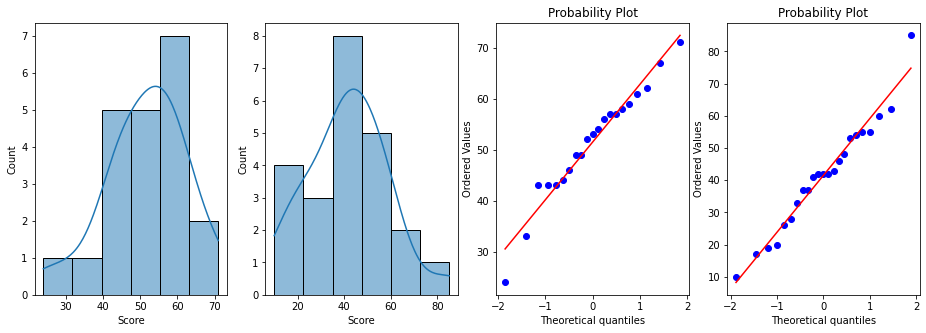

In [4]:
df = pd.read_csv('readingspeed.txt', sep=' ')

# 1. Визначити, залежні чи незалежні вибірки задано у задачі. 
# Вибірки незалежні, вони характеризують непересічні способи навчитися читати
# Цей висновок робиться на основі розуміння способу отримання вибірок

print("Вибірки незалежні")

# 2. Якщо вибірки незалежні: 
# – перевірити, чи нормально розподілені дані кожної вибірки, скориставшись лабораторною роботою 1; 

my_graph(df, 'LearningType', 'DRA', 'SC', 'Score')

# Перевірка за коеф.

x = my_coef(df, 'LearningType', 'DRA', 'Score')
y = my_coef(df, 'LearningType', 'SC', 'Score')

# – для кожної вибірки проаналізувати середнє та 95% довірчий інтервал для нього; 
#   якщо хоча б одна з вибірок розподілена не за нормальним законом, то поряд із середнім проаналізувати
#   медіану та 95% довірчий інтервал для неї; 

# Дані кожної вибірки розподілені нормально

if x and y :
    my_mean(df, 'LearningType', 'DRA', 'Score') 
    my_mean(df, 'LearningType', 'SC', 'Score')
else :
    my_mean(df, 'LearningType', 'DRA', 'Score', 1) 
    my_mean(df, 'LearningType', 'SC', 'Score', 1)
    
# – застосувати для розв’язання задачі параметричний або ранговий критерій в залежності від результатів перевірки на нормальність. 

# параметричний критерій

my_param(df, 'LearningType', 'DRA', 'SC', 'Score') 

# Висновок: швидкість читання у разі навчання за цими методиками відрізняється, вибірки неоднорідні.

Вибірки незалежні

 ---------------------------  South  --------------------------- 


Параметр,Значення
A,0.108616
sigmaA,0.428845
uA,0.253277
E,-0.812924
sigmaE,1.992620
uE,-0.407967
ABS uA,0.253277
ABS uE,0.407967
Quantile,1.959964
Висновок,Нормальний розподіл ідентифікується



 ---------------------------  North  --------------------------- 


Параметр,Значення
A,0.065174
sigmaA,0.380443
uA,0.171311
E,-0.070613
sigmaE,2.101374
uE,-0.033603
ABS uA,0.171311
ABS uE,0.033603
Quantile,1.959964
Висновок,Нормальний розподіл ідентифікується


Середнє для South,Довірчий інтервал
1376.807692,[1322.891 ; 1430.724]


Середнє для North,Довірчий інтервал
1633.600000,[1588.234 ; 1678.966]


Показник,Значення
Mean X,1376.807692
Mean Y,1633.600000
Undisplaced variance X,19675.441538
Undisplaced variance Y,18751.717647
F Statistics,1.049261
Q1,0.464646
Q2,2.062331
Висновок,Дисперсії показників рівні
levene statistics,0.152112
levene pvalue,0.697929


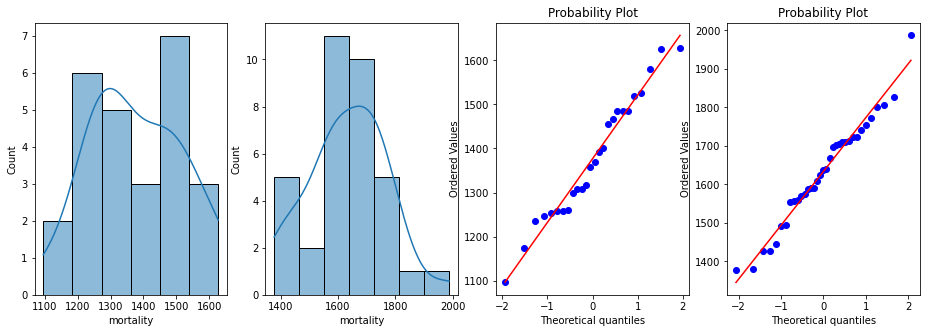

In [15]:
df = pd.read_csv('water.txt', sep='\t')

# 1. Визначити, залежні чи незалежні вибірки задано у задачі. 
# Вибірки незалежні, вони характеризують непересічні райони
# Цей висновок робиться на основі розуміння способу отримання вибірок

print("Вибірки незалежні")

# 2. Якщо вибірки незалежні: 
# – перевірити, чи нормально розподілені дані кожної вибірки, скориставшись лабораторною роботою 1; 

my_graph(df, 'location', 'South', 'North', 'mortality')

# Перевірка за коеф.

x = my_coef(df, 'location', 'South', 'mortality')
y = my_coef(df, 'location', 'North', 'mortality')

# – для кожної вибірки проаналізувати середнє та 95% довірчий інтервал для нього; 
#   якщо хоча б одна з вибірок розподілена не за нормальним законом, то поряд із середнім проаналізувати
#   медіану та 95% довірчий інтервал для неї; 

# Дані кожної вибірки розподілені нормально

if x and y :
    my_mean(df, 'location', 'South', 'mortality') 
    my_mean(df, 'location', 'North', 'mortality')
else :
    my_mean(df, 'location', 'South', 'mortality', 1) 
    my_mean(df, 'location', 'North', 'mortality', 1)
    
# – застосувати для розв’язання задачі параметричний або ранговий критерій в залежності від результатів перевірки на нормальність. 

# параметричний критерій

my_param(df, 'location', 'South', 'North', 'mortality') 

# Висновок: смертність на півночі та на півдні відрізняється.


Вибірки незалежні

 ---------------------------  South  --------------------------- 


Параметр,Значення
A,-0.104629
sigmaA,0.428845
uA,-0.243978
E,-1.030343
sigmaE,1.992620
uE,-0.517079
ABS uA,0.243978
ABS uE,0.517079
Quantile,1.959964
Висновок,Нормальний розподіл ідентифікується



 ---------------------------  North  --------------------------- 


Параметр,Значення
A,1.110587
sigmaA,0.380443
uA,2.919195
E,-0.051778
sigmaE,2.101374
uE,-0.024640
ABS uA,2.919195
ABS uE,0.024640
Quantile,1.959964
Висновок,Нормальний розподіл не ідентифікується


Середнє для South,Довірчий інтервал
69.769231,[54.255 ; 85.283]


Медіана для South,Довірчий інтервал
78.000000,[53.000 ; 96.000]


Середнє для North,Довірчий інтервал
30.400000,[21.742 ; 39.058]


Медіана для North,Довірчий інтервал
18,[14.000 ; 39.000]


Показник,Значення
W_X,1058.500000
E{W_X},806.000000
D{W_X},4701.666667
U,3.682438
Quantile,1.959964
Висновок,У функціях розподілу показників є зсув
ranksums statistics,3.682438
ranksums pvalue,0.000231
ranksums pvalue > alpha,У функціях розподілу показників є зсув


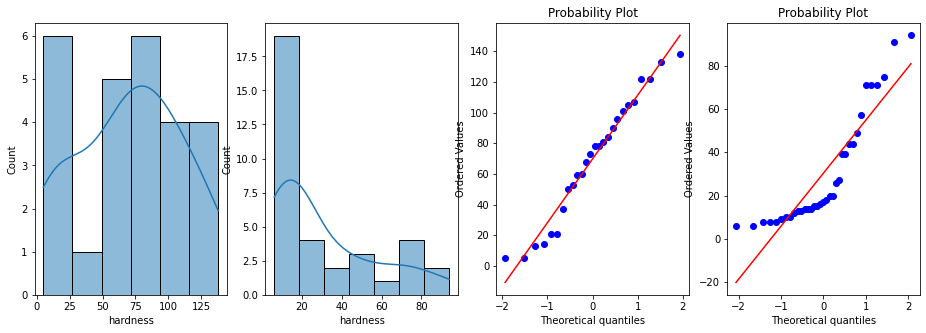

In [16]:
df = pd.read_csv('water.txt', sep='\t')

# 1. Визначити, залежні чи незалежні вибірки задано у задачі. 
# Вибірки незалежні, вони характеризують непересічні райони
# Цей висновок робиться на основі розуміння способу отримання вибірок

print("Вибірки незалежні")

# 2. Якщо вибірки незалежні: 
# – перевірити, чи нормально розподілені дані кожної вибірки, скориставшись лабораторною роботою 1; 

my_graph(df, 'location', 'South', 'North', 'hardness')

# Перевірка за коеф.

x = my_coef(df, 'location', 'South', 'hardness')
y = my_coef(df, 'location', 'North', 'hardness')

# – для кожної вибірки проаналізувати середнє та 95% довірчий інтервал для нього; 
#   якщо хоча б одна з вибірок розподілена не за нормальним законом, то поряд із середнім проаналізувати
#   медіану та 95% довірчий інтервал для неї; 

# Дані не кожної вибірки розподілені нормально

if x and y :
    my_mean(df, 'location', 'South', 'hardness') 
    my_mean(df, 'location', 'North', 'hardness')
else :
    my_mean(df, 'location', 'South', 'hardness', 1) 
    my_mean(df, 'location', 'North', 'hardness', 1)
    
# – застосувати для розв’язання задачі параметричний або ранговий критерій в залежності від результатів перевірки на нормальність. 

# ранговий критерій

my_WilcoxonRankSums(df, 'location', 'South', 'North', 'hardness') 

# Висновок: жорсткість води на півночі та на півдні відрізняється.


Вибірки залежні

 ---------------------------  Placebo  --------------------------- 


Параметр,Значення
A,1.150368
sigmaA,0.442217
uA,2.601367
E,0.560472
sigmaE,1.958532
uE,0.286169
ABS uA,2.601367
ABS uE,0.286169
Quantile,1.959964
Висновок,Нормальний розподіл не ідентифікується



 ---------------------------  Methylphenidate  --------------------------- 


Параметр,Значення
A,0.819854
sigmaA,0.442217
uA,1.853965
E,-0.001234
sigmaE,1.958532
uE,-0.000630
ABS uA,1.853965
ABS uE,0.000630
Quantile,1.959964
Висновок,Нормальний розподіл ідентифікується



 --------------------------- Вибірка різниць --------------------------- 


Середнє для вибірки різниць,Довірчий інтервал
-4.958333,[-7.974 ; -1.942]


Параметр,Значення
A,-0.225863
sigmaA,0.442217
uA,-0.510752
E,0.000154
sigmaE,1.958532
uE,0.000078
ABS uA,0.510752
ABS uE,0.000078
Quantile,1.959964
Висновок,Нормальний розподіл ідентифікується


Показник,Значення
T,48.500000
E{T},150.000000
D{T},1225.000000
U,-2.900000
Quantile,1.959964
Висновок,У функціях розподілу показників є зсув
wilcoxon statistics,48.500000
wilcoxon pvalue,0.002516
wilcoxon pvalue > alpha,У функціях розподілу показників є зсув


Показник,Значення
Mean X,39.750000
Mean Y,44.708333
Undisplaced variance X,128.021739
Undisplaced variance Y,151.780797
F Statistics,0.843465
Q1,0.432593
Q2,2.311641
Висновок,Дисперсії показників рівні
levene statistics,0.695120
levene pvalue,0.408737


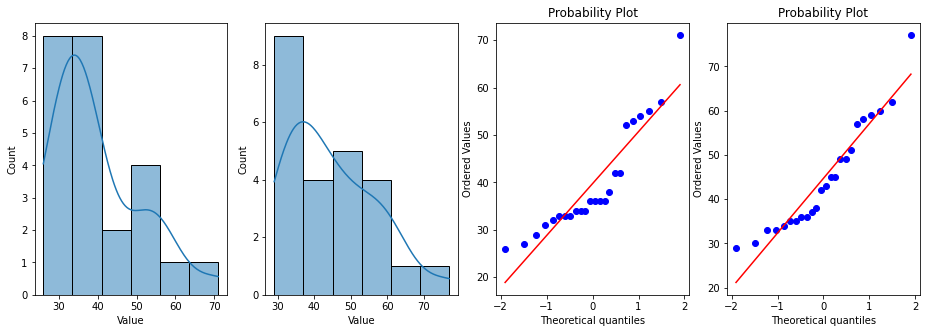

In [20]:
df = pd.read_csv('ADHD.txt', sep=' ')

# 1. Визначити, залежні чи незалежні вибірки задано у задачі. 
# Вибірки залежні, вони характеризують спостереження над одними і тими самими людьми
# Цей висновок робиться на основі розуміння способу отримання вибірок

print("Вибірки залежні")

my_graph(df, 'Method', 'Placebo', 'Methylphenidate', 'Value')

# Перевірка за коеф.

x = my_coef(df, 'Method', 'Placebo', 'Value')
y = my_coef(df, 'Method', 'Methylphenidate', 'Value')

# – для кожної вибірки проаналізувати середнє та 95% довірчий інтервал для нього; 
#   якщо хоча б одна з вибірок розподілена не за нормальним законом, то поряд із середнім проаналізувати
#   медіану та 95% довірчий інтервал для неї; 

# Дані кожної вибірки розподілені нормально

my_difference(df, 'Method', 'Placebo', 'Methylphenidate', 'Value')

# – застосувати для розв’язання задачі параметричний або ранговий критерій в залежності від результатів перевірки на нормальність. 

# параметричний критерій

my_Wilcoxon(df, 'Method', 'Placebo', 'Methylphenidate', 'Value') 
my_param(df, 'Method', 'Placebo', 'Methylphenidate', 'Value',1) 

# Висновок: ефективність метилфеніду та плацебо відрізняються.

Вибірки незалежні

 ---------------------------  Шардоне  --------------------------- 


Значення,Параметр
A,0.763043
sigmaA,0.472866
uA,1.613656
E,-0.154123
sigmaE,1.872407
uE,-0.082313
ABS uA,1.613656
ABS uE,0.082313
Quantile,1.959964
Висновок,Нормальний розподіл ідентифікується



 ---------------------------  Каберне Совіньон  --------------------------- 


Значення,Параметр
A,0.687634
sigmaA,0.472866
uA,1.454183
E,-0.077912
sigmaE,1.872407
uE,-0.041611
ABS uA,1.454183
ABS uE,0.041611
Quantile,1.959964
Висновок,Нормальний розподіл ідентифікується


Середнє для Шардоне,Довірчий інтервал
23.900000,[22.537 ; 25.263]


Середнє для Каберне Совіньон,Довірчий інтервал
25.100000,[23.342 ; 26.858]



 --------------------------- Вибірка різниць --------------------------- 


Середнє для вибірки різниць,Довірчий інтервал
-1.200000,[-2.060 ; -0.340]


Значення,Параметр
A,0.671809
sigmaA,0.472866
uA,1.420716
E,-0.851294
sigmaE,1.872407
uE,-0.454652
ABS uA,1.420716
ABS uE,0.454652
Quantile,1.959964
Висновок,Нормальний розподіл ідентифікується


Показник,Значення
Mean X,23.900000
Mean Y,25.100000
Undisplaced variance X,9.673684
Undisplaced variance Y,16.094737
F Statistics,0.601046
Q1,0.395812
Q2,2.526451
Висновок,Дисперсії показників рівні
levene statistics,0.487179
levene pvalue,0.489437


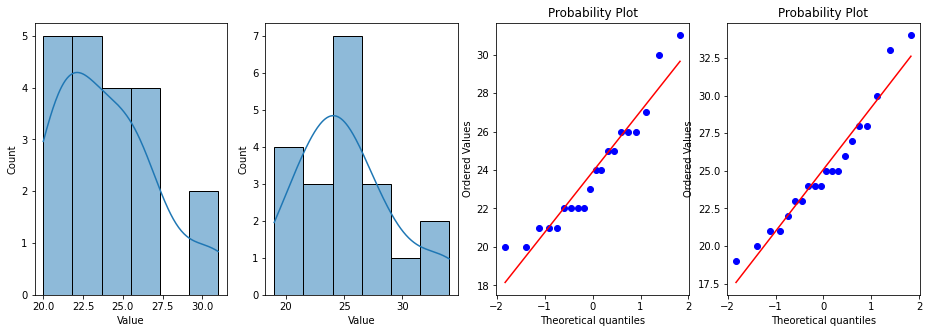

In [21]:
df = pd.read_csv('wines3.txt', sep='\t')

# 1. Визначити, залежні чи незалежні вибірки задано у задачі. 
# Вибірки незалежні, вони характеризують непересічні оцінки експертів
# Цей висновок робиться на основі розуміння способу отримання вибірок

print("Вибірки незалежні")

# 2. Якщо вибірки незалежні: 
# – перевірити, чи нормально розподілені дані кожної вибірки, скориставшись лабораторною роботою 1; 

my_graph(df, 'wine', 'Шардоне', 'Каберне Совіньон', 'Value')

# Перевірка за коеф.

x = my_coef(df, 'wine', 'Шардоне', 'Value')
y = my_coef(df, 'wine', 'Каберне Совіньон', 'Value')

# – для кожної вибірки проаналізувати середнє та 95% довірчий інтервал для нього; 
#   якщо хоча б одна з вибірок розподілена не за нормальним законом, то поряд із середнім проаналізувати
#   медіану та 95% довірчий інтервал для неї; 

# Дані кожної вибірки розподілені нормально

if x and y :
    my_mean(df, 'wine', 'Шардоне', 'Value') 
    my_mean(df, 'wine', 'Каберне Совіньон', 'Value')
else :
    my_mean(df, 'wine', 'Шардоне', 'Value', 1) 
    my_mean(df, 'wine', 'Каберне Совіньон', 'Value', 1)
    
# – застосувати для розв’язання задачі параметричний або ранговий критерій в залежності від результатів перевірки на нормальність. 

# параметричний критерій

#my_param(df, 'wine', 'Шардоне', 'Каберне Совіньон', 'Value')
my_difference(df, 'wine', 'Шардоне', 'Каберне Совіньон', 'Value') 
my_param(df, 'wine', 'Шардоне', 'Каберне Совіньон', 'Value') 
# Висновок: на основі цих показників вина не відрізняються.